# Data Exploration on NYC Airbnb Open Data 

Group Members:

Nurullah Çırak 

Hande Alptekin 


## Introduction

The aim of this project is to examine NYC Airbnb Data and show the variables which have a significant effect on pricing of the housings.
The relations that will be examined are listed below:


1.   Price and location
2.   Price and review quantity
3.   Price and availability of the housing
3.   Price and type of the housing




### Problem Definition

Our aim is to see if above mentioned variables have an effect on pricing, and if there is, to what extent do they decide on pricing? Are there other variables affecting on price too, or are these mainly deciding on the price of the housings.

### Utilized Datasets

#### Datasets



1.   NYC Airbnb Open Data: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

#### Kernels

1.   Data Exploration on NYC Airbnb: https://www.kaggle.com/dgomonov/data-exploration-on-nyc-airbnb
2.   Hospitality in Era of Airbnb: https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb

#### Methods Used



1.   Categorizing price and review quantities by defining functions
2.   Creating bar charts and pie charts using Panda library
3.   Showing the density of the housings using heat map feature of Folium
4.   Showing ensity and distribution of prices for each neighberhood group using violin plot feature of Seaborn library
5.   Applying different machine learning algorithms and see the accuracy scores of them.


## Data Exploration

### Explanation of dataset 


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [ ]:
df = pd.read_csv(join(path_prefix, "AB_NYC_2019.csv"))
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
#length of dataframe
len(df)

48895

In [ ]:
#each object's type in dataframe
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#to understand and see null variables in dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#in comings codes part we will examine last review, therefore we will replace null variable with 0
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [ ]:
#name of unique neighbourhood group in dataset
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#name of unique neighbourhood in dataset
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

### Price Category and Distrubition

In order to better understand price of each housing, we categorize the price into 5 groups. Groups are determined according to our researchs and experiences. We will examine price realiton with other variables in later parts with the help of these categorized groups.


In [ ]:
def price_categorize(y):
  if y <= 50:
    return "very cheap"
  elif y > 50 and y<= 150 :
    return "cheap"
  elif y >150 and y<=300:
    return "medium"
  elif y>300 and y <=500:
    return "expensive"
  else:
    return "very expensive"
df['price_category']=df['price'].apply(price_categorize)

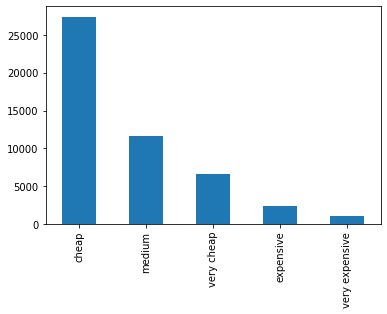

In [ ]:
#count of price categories
df['price_category'].value_counts().plot(kind='bar')

By this distribution, we can clearly see that cheaper housings have greater quantity. As price increases, number of housings decrease. 

### Price and Location
In first code cells we will visualise the dataset, 
group by neighboorhood_group and neighboorhood,
show in the map and heatmap


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


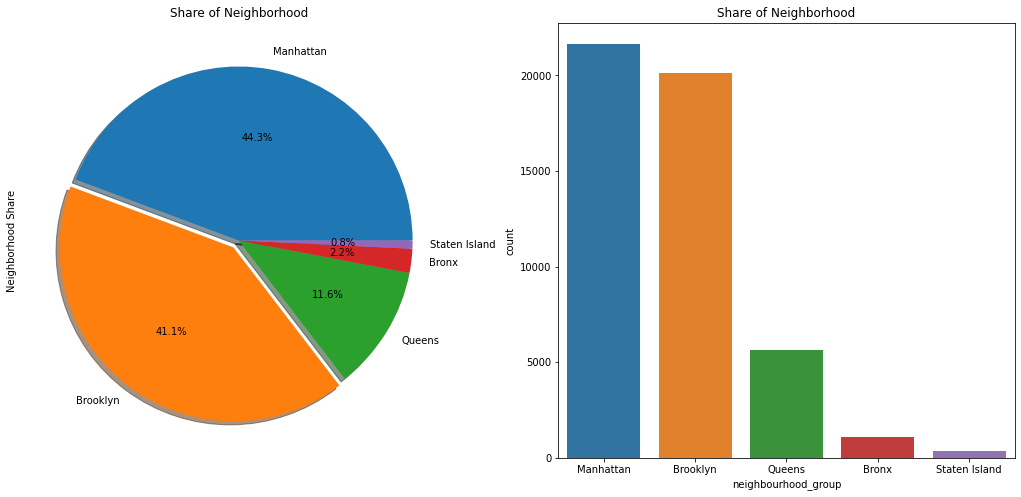

In [ ]:
#Airbnb hotel distribution according to neighborhood 
#coden taken and updated from ...hospitality
import seaborn as sns 
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

As shown in above figures most of the Airbnb House are in Manhattan and Brooklyn. Their percentage is quite similar nearly %40 for both Manhattan and Brooklyn.

In [ ]:
import folium 
from folium.plugins import heat_map
latitude_mean = df['latitude'].mean()
longitude_mean = df['longitude'].mean()
map = folium.Map(location=[latitude_mean,longitude_mean], zoom_start = 12, tiles='Stamen Terrain')

In [ ]:
#heatmap
import folium
from folium.plugins import HeatMap
location=df[['latitude','longitude']].dropna()
location=np.unique(location,axis=0)
HeatMap(location,radius=12).add_to(map)
map

Heat map that shows density of Airbnb house. Red areas show high density and blue areas show low density. Red areas mostly Manhattan and Brooklyn as we see in above charts. 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

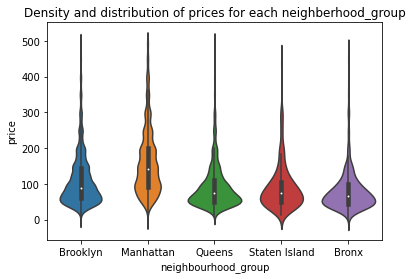

In [ ]:
p_350=df[df.price < 500]#price which is higher than 500 is ver expensive group which are mostly ouliers so we take pricce under 500 and plot distribution
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=p_350, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

In this plot we excluded the outliers of price to show distributions and mean of this type. It shows that Manhattan is the most expensive which its average is almost 160 dollar per night, then comes Brooklyn with nearly 90 dollar per night. The cheapest is Bronx.

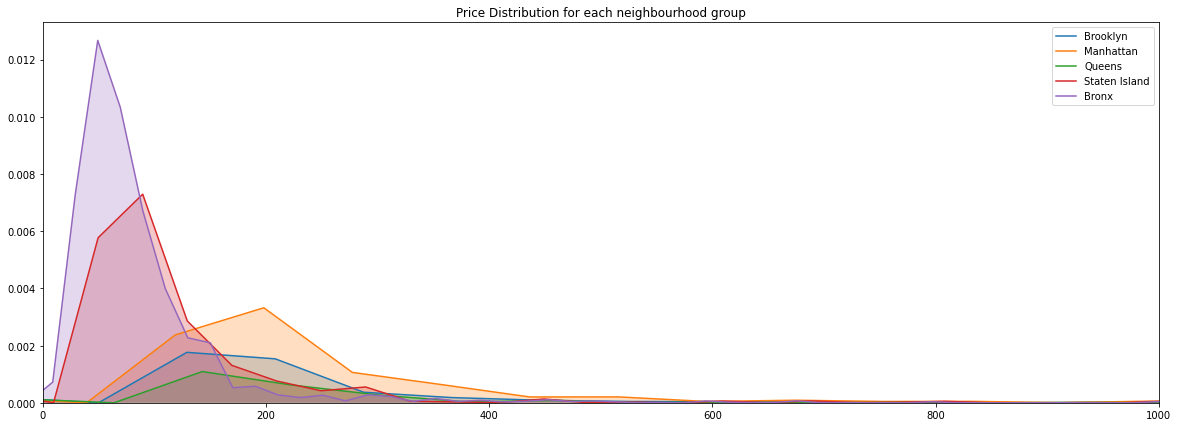

In [ ]:
a=df[df['neighbourhood_group']=='Brooklyn']['price']
b=df[df['neighbourhood_group']=='Manhattan']['price']
c=df[df['neighbourhood_group']=='Queens']['price']
d=df[df['neighbourhood_group']=='Staten Island']['price']
e=df[df['neighbourhood_group']=='Bronx']['price']
fig, ax = plt.subplots(1,1 ,figsize=(20,7))
sns.kdeplot(a, shade=True, ax=ax, label="Brooklyn")
sns.kdeplot(b, shade=True, ax=ax, label="Manhattan")
sns.kdeplot(c, shade=True, ax=ax, label="Queens")
sns.kdeplot(d, shade=True, ax=ax, label="Staten Island")
sns.kdeplot(e, shade=True, ax=ax, label="Bronx")
plt.title("Price Distribution for each neighbourhood group")
plt.xlim(0,1000)
plt.show()

This plot shows all price (included outliers which are very expensive) distribuitons of neighbourhood groups.

124.38320732192598 196.8758136743456 99.51764913519237 114.81233243967829 87.4967919340055


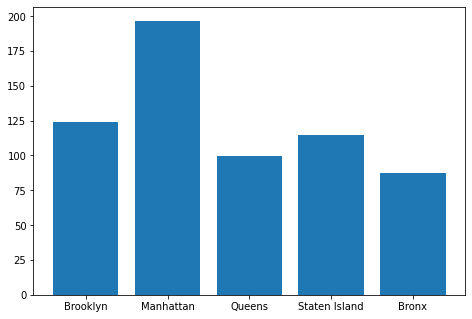

In [ ]:
#mean of neighbourhood calculation
a=df[df['neighbourhood_group']=='Brooklyn']['price'].mean()
b=df[df['neighbourhood_group']=='Manhattan']['price'].mean()
c=df[df['neighbourhood_group']=='Queens']['price'].mean()
d=df[df['neighbourhood_group']=='Staten Island']['price'].mean()
e=df[df['neighbourhood_group']=='Bronx']['price'].mean()
print(a,b,c,d,e)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
f = ['Brooklyn','Manhattan','Queens','Staten Island','Bronx']
g= [a,b,c,d,e]
ax.bar(f, g)
plt.show()

This bar chart shows average price of neighbourhood_group. Of course average is bigger because we included all prices(inlueded outliers). The ranking is still same. Manhattan is most expensive neighbourhood_group and Bronx is cheapest neighbourhood_group. We were expected that result. Because Manhattan is most expensive is city in USA even all around the world. Bronx is very cheap city in USA. This also appears in Airbnb house price.

In [ ]:
# creating a crosstab for looking at prices in different regions of nyc
df2=pd.crosstab(df['neighbourhood_group'],df['price_category'])
df2

price_category,cheap,expensive,medium,very cheap,very expensive
neighbourhood_group,,,,,
Bronx,640,17,55,372,7
Brooklyn,12248,537,3509,3581,229
Manhattan,10776,1679,7397,1036,773
Queens,3511,78,580,1468,29
Staten Island,221,2,40,104,6


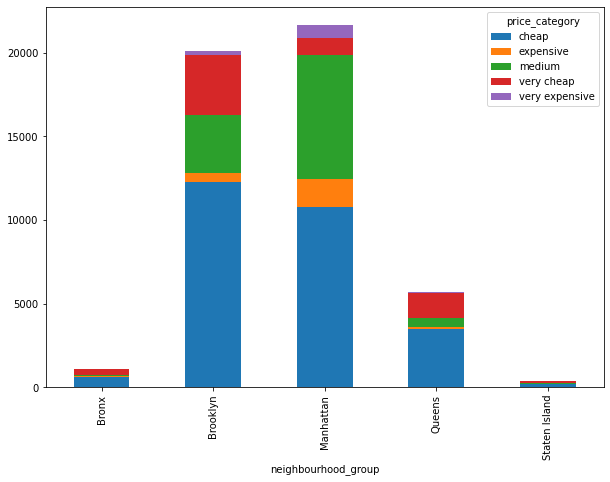

In [ ]:
# showing the crosstab data above in a bar chart
df2.loc[:,['cheap','expensive', 'medium','very cheap','very expensive']].plot.bar(stacked=True, figsize=(10,7))

By using contingency table, we visualise frequency of two categories which are neighbourhood group and price group. So, we can say most of expensive and very expensive even medium price Airbnb housings are placed in Manhattan or Brooklyn. We will use number in next step (final project).

### Price and Review Quantity

The number of reviews show how many customers the housing mentioned had. It basically means popularity of the housing in a sense.

In [ ]:
# defining a function to define the housings whether they have more reviews or less reviews
def review_categorize(x):
  if x <= 50:
    return "least reviewed"

  elif x >50 and x<=200:
    return "medium"

  elif x>200 and x <=400:
    return "quite many reviewed"

  else:
    return "most reviewed"

df['review_category']=df['number_of_reviews'].apply(review_categorize)
# sorting the list from the highest number of reviews to the lowest
df1= df.nlargest(len(df),'number_of_reviews')
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category,review_category
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333,very cheap,most reviewed
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293,very cheap,most reviewed
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342,very cheap,most reviewed
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339,very cheap,most reviewed
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173,very cheap,most reviewed


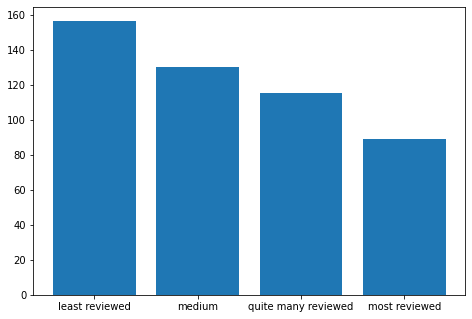

In [ ]:
# calculating the average prices according to different groups of review quantities
priceavg_least_reviewed      =df[df['review_category'] == 'least reviewed'].price.mean()
priceavg_medium              =df[df['review_category'] == 'medium'].price.mean()
priceavg_quite_many_reviewed =df[df['review_category'] == 'quite many reviewed'].price.mean()
priceavg_most_reviewed       =df[df['review_category'] == 'most reviewed'].price.mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categories = ['least reviewed','medium','quite many reviewed','most reviewed']
price_avg = [priceavg_least_reviewed, priceavg_medium, priceavg_quite_many_reviewed, priceavg_most_reviewed]
ax.bar(categories, price_avg)
plt.show()

Here, we saw that price and review quantity are inversely proportional.
We can say that most reviewed housings are the cheap housings, since they are the most accessible for many people.

### Price and Availability of House


In [ ]:
# sorting the list according to the highest ones having the most avaiability.
df= df.nlargest(len(df),'availability_365')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category,review_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,cheap,least reviewed
11591,9024549,Spacious & Lofted in Williamsburg,8313697,Koppel,Brooklyn,Park Slope,40.67300,-73.98076,Private room,120,20,0,NaN,0.00,1,365,cheap,least reviewed
41757,32467835,SPACIOUS & COMFY 3 BDROM/2 BATH APT CLOSE 2 SU...,216419980,Billie,Manhattan,Harlem,40.82420,-73.95106,Entire home/apt,112,30,0,NaN,0.00,1,365,cheap,least reviewed
41747,32466179,Sonder | The Nash | Classic 1BR + Fitness Center,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74898,-73.97534,Entire home/apt,202,29,0,NaN,0.00,327,365,medium,least reviewed
41742,32463948,Amazing East Village Loft,238779678,Dustin,Manhattan,East Village,40.72704,-73.98916,Private room,55,30,0,NaN,0.00,9,365,cheap,least reviewed


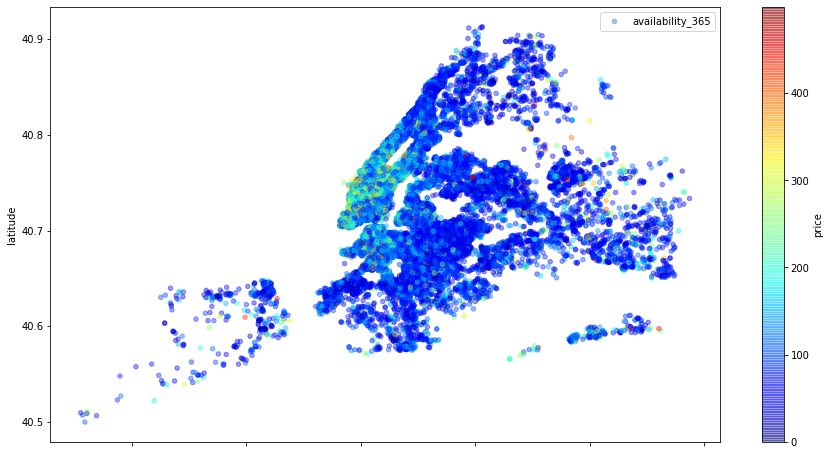

In [ ]:
#data-exploreation kernell
group=df[df.price<500]#by <500 we are taking all price category except very expensive category bc they are outliers
availability=group.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(15,8))
availability.legend()

No direct correlation between availability and pricing has been found. It will be examined further for the final report.

### Price and Type Of The Housing


In [ ]:
# creating a crosstab to see how many houses are t
df2=pd.crosstab(df['room_type'],df['price_category'])
df2

price_category,cheap,expensive,medium,very cheap,very expensive
room_type,,,,,
Entire home/apt,11767,2087,10472,190,893
Private room,15200,211,1064,5708,143
Shared room,429,15,45,663,8


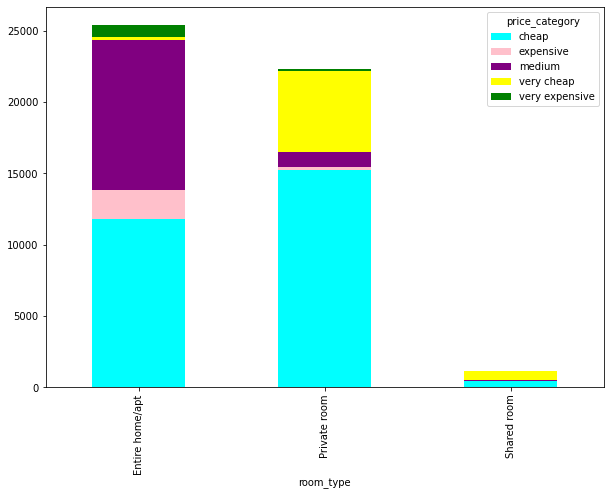

In [ ]:
colors=['aqua','pink','purple','yellow','green']
df2.loc[:,['cheap','expensive', 'medium','very cheap','very expensive']].plot.bar(stacked=True, color=colors, figsize=(10,7))

We can see from this that expensive housings are mostly are in the entire home/apt category. 
Further exploration will be done.

## Machine Learning Models

In these models, we will create a model to predict price with previously mentioned variables in the data exploration part. 
We will measure each model's accuracy score to see if we have achieved this goal of correctly calculating the relation between these variables 
and the price.

> KNN MODELS


    Price taken as categorical target based on we created previous section

1.   *Euclidean Distance Model*
2.   *Manhattan Distance Model*
3.   *Chebyshev Distance Model*

> DECISION TREE

    Again, price taken as categorical target based on categories that we created in previous section

> REGRESSION MODEL
    
    We take price as continuous target to create a model. Before creating model we made log transform to obtain better regression models.
  Models
1.   *KNN Regression*
2.   *Decision Tree Regression*
3.   *Random Forest Regression*

In [ ]:
#Before creating a models, handling the outliers for price
factor = 2
mean = df['price'].mean()
std = df['price'].std()
 
upper_lim = mean + std * factor
lower_lim = mean - std * factor
 
df = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category,review_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,cheap,least reviewed
11591,9024549,Spacious & Lofted in Williamsburg,8313697,Koppel,Brooklyn,Park Slope,40.67300,-73.98076,Private room,120,20,0,NaN,0.00,1,365,cheap,least reviewed
41757,32467835,SPACIOUS & COMFY 3 BDROM/2 BATH APT CLOSE 2 SU...,216419980,Billie,Manhattan,Harlem,40.82420,-73.95106,Entire home/apt,112,30,0,NaN,0.00,1,365,cheap,least reviewed


In [ ]:
#Before creating a models, we created a simple dateset from our original dataset to see and use easliy
df['neighbourhood_group']= df['neighbourhood_group'].astype('category')
df['neighbourhood_category']=df['neighbourhood_group'].cat.codes

df['room_type']= df['room_type'].astype('category')
df['c_room_type']=df['room_type'].cat.codes

df['price_category']= df['price_category'].astype('category')
df['num_price_category']=df['price_category'].cat.codes

sdf= df[['num_price_category','number_of_reviews','neighbourhood_category','c_room_type','availability_365']].copy()
sdf.head()

,num_price_category,number_of_reviews,neighbourhood_category,c_room_type,availability_365
0,0,9,1,1,365
11591,0,0,1,1,365
41757,0,0,2,0,365
41747,2,0,2,0,365
41742,0,0,2,1,365


### Implementation

**KNeighbors Model**



> We will create 3 knn model for each distance metrics. We will execute hyperparamter tunning for k value to determine best k value.



In [ ]:
#Test-data split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
A=sdf.drop('num_price_category',axis=1).values
B=sdf['num_price_category'].values
#80% for training and 20% for testing-validation
a_train, a_remaining, b_train, b_remaining = train_test_split(A, B, test_size=0.20, random_state=42)
#10% validation, 10% test
a_test, a_val, b_test, b_val = train_test_split(a_remaining, b_remaining, test_size=0.50, random_state=42)

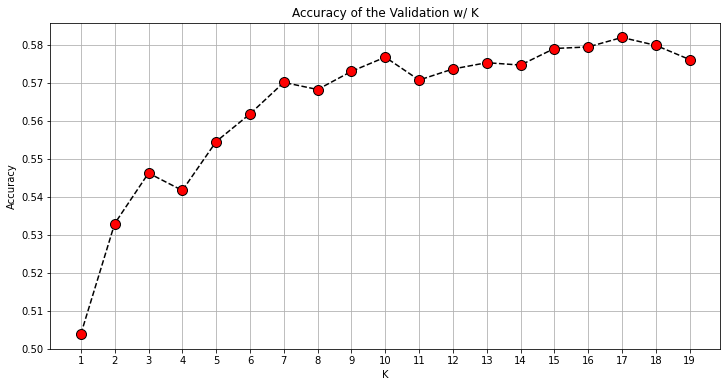

In [ ]:
#taken from recit 10 to determine best k value for our models
from sklearn.metrics import accuracy_score
K_range = np.arange(1, 20)
accuracy_list = []
for k in K_range:
  # create a new model with current K
  knn = KNeighborsClassifier(k,metric="euclidean")
  # fit training data
  knn.fit(a_train, b_train)
  # predict the validation data
  b_pred = knn.predict(a_val)
  # obtain the accuracy value
  accuracy = accuracy_score(b_val, b_pred)
  accuracy_list.append(accuracy)

plt.figure(figsize=(12, 6))  
plt.plot(K_range, accuracy_list, color='black', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Validation w/ K')  
plt.xlabel('K')  
plt.ylabel('Accuracy')
plt.xticks(K_range)
plt.grid()
plt.show()

This figure plotted to determine best k value for our test. It gives us to best accuracy score. So our k value is equal to 17.

(note: we executed this funtion several times with different metrics and this was best in most of the time)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean, cityblock, chebyshev

k=17
#to obtain better accuracy, we made standardization 
scaler = StandardScaler()
scaler.fit(A,B)
#scaler.mean_
A1=scaler.transform(A)
a_train, a_remaining, b_train, b_remaining = train_test_split(A1, B, test_size=0.20, random_state=0)
a_test, a_val, b_test, b_val = train_test_split(a_remaining, b_remaining, test_size=0.50, random_state=0)

#calculate euclidian accuracy score 
eu_model= KNeighborsClassifier(k, metric="euclidean")
eu_model.fit(a_train,b_train)
b_predict=eu_model.predict(a_val)
eu_score1= f"{accuracy_score(b_val, b_predict):.2f}"
print("Euclidian Accuracy Score: ",eu_score1)

#calculate manhattan accuracy score
man_model= KNeighborsClassifier(k, metric="cityblock")
man_model.fit(a_train,b_train)
b_predict=man_model.predict(a_val)
man_score1= f"{accuracy_score(b_val, b_predict):.2f}"
print("Manhhattan Accuracy Score: ",man_score1)

#calculate Chebyshev accuracy score 
cheb_model= KNeighborsClassifier(k, metric="chebyshev")
cheb_model.fit(a_train,b_train)
b_predict=cheb_model.predict(a_val)
cheb_score1= f"{accuracy_score(b_val, b_predict):.2f}"
print("Chebyshev Accuracy Score: ",cheb_score1)

Euclidian Accuracy Score:  0.61
Manhhattan Accuracy Score:  0.61
Chebyshev Accuracy Score:  0.61


**Decision Tree Model**


> Firstly, hyperparameter tunning to determine our best parameters.
Then, created a decision tree model.





In [ ]:
#to create decision tree model, we executed hyperparameter tunning 
from sklearn import tree
from sklearn.model_selection import cross_val_score
accuracy_list = []
accuracy_SD_list = []

scaler = StandardScaler()
scaler.fit(A,B)
#scaler.mean_
A2=scaler.transform(A)

a_train, a_test, b_train, b_test = train_test_split(A2,B, test_size=0.20, random_state=1)
for depth in range(1, 10):
  model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=depth)
  accuracies_CV = cross_val_score(model, a_train, b_train, cv=5)
  accuracy_list.append(accuracies_CV.mean())
  accuracy_SD_list.append(accuracies_CV.std())

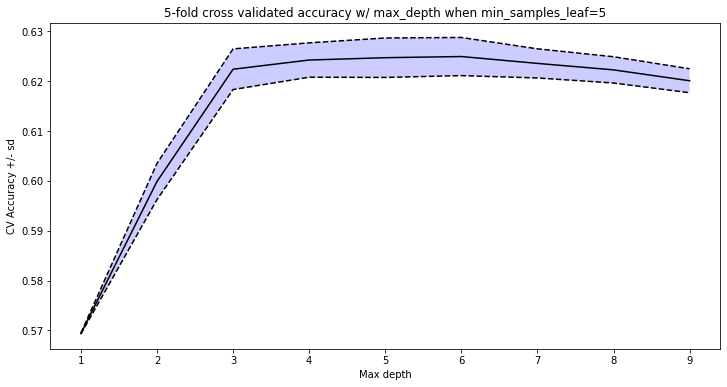

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 10), accuracy_list, color='black', linestyle='solid')
plt.plot(range(1, 10), np.array(accuracy_list) + np.array(accuracy_SD_list),color='black', linestyle='dashed')
plt.plot(range(1, 10), np.array(accuracy_list) - np.array(accuracy_SD_list),color='black', linestyle='dashed' )
plt.fill_between(range(1, 10), np.array(accuracy_list) + np.array(accuracy_SD_list), np.array(accuracy_list) - np.array(accuracy_SD_list), alpha=0.2, facecolor ='b')
plt.plot()
plt.title('5-fold cross validated accuracy w/ max_depth when min_samples_leaf=5')  
plt.xlabel('Max depth')  
plt.ylabel('CV Accuracy +/- sd') 
plt.show()

We set min_samples_leaf to 5 (in many execution it gives us to best score). Then, we tested max_depth with several numbers and max_depth=6 gave the best accuray score.

In [ ]:
#create decision tree model
a_train, a_test, b_train, b_test = train_test_split(A2,B, test_size=0.20, random_state=1)
t1_model = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=6)
t1_model.fit(a_train, b_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#cross validation cv=5
score_train1= cross_val_score(t1_model, a_train, b_train, cv=5)
print("Model train accuracy score mean:", score_train1.mean())
score_test1= cross_val_score(t1_model, a_test, b_test, cv=5)
print("Model test accuracy score mean:", score_test1.mean())

Model train accuracy score mean: 0.6249286026270833
Model test accuracy score mean: 0.6238320723928201


**Regression Models**


> Previous models was created with categhorical classification of price. This part we created a model taking price as conitnious variable. In the result part we will discuss differences. Firstly, to obtain better score we made log transform of price.








In [ ]:
#log transform for price 
df['plog'] = (df['price'] + 1).transform(np.log)

In [ ]:
#REGRESSION MODELS- Random Forest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
features =  ["number_of_reviews", "availability_365","neighbourhood_category", "c_room_type"]
X = df[features].values  # converting to column vector
y = df['plog'].values

#RANDOM FOREST 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# import model
rf = RandomForestRegressor(n_estimators=100)
# train as usual
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 0.22638306105445324
mae: 0.3625974288248996
rmse: 0.4757972898771632


In [ ]:
#DECISION TREEE REGRESSION MODEL
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))


mse: 0.29991939579530097
mae: 0.4134455008675649
rmse: 0.5476489713267989


In [ ]:
#K-NEIGHBORS REGRESSION MODEL
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("mse: {}".format(mse))
print("mae: {}".format(mae))
print("rmse: {}".format(rmse))

mse: 0.3646740844239836
mae: 0.46912514205371475
rmse: 0.6038825087912247


### Results & Discussion


We cleaned our data, removed outliers. We categorized the variables for classification models. We used different models to test our data and here are our results.

***KNN Model Accuracy Scores***

>Distance Metric| Standardized Features
>--- |  --- 
>Euclidean | 0.61
>Manhattan | 0.61
>Chebyshev | 0.61 


---



Each metrics we obtaied same accuracy levels which are 0.61. It shows us that our assumptions were tested with different KNN metrics and they showed up to be mostly true.

***Decision Tree Model Accuracy Scores***

>Score | Accuracy Scores
>--- |  --- 
>Test | 0.625
>Data | 0.6238

We created 5 fold cross validation to the decision tree model to make the prediction more valid. We took means of accuracy scores to evaluate it easier. Model gave us an accuracy score of %62, which shows us that our assumptions were mostly true. 



---





***Regression Models Errors***


>Error Type| Random Forest | Decision Tree | KNN
>--- | --- | --- | --- 
>Mse | 0.226 | 0.299 | 0.364
>Mae | 0.362 | 0.413 | 0.469
>Rmse | 0.475 | 0.547 | 0.603


---

We calculated error rates to see to what degree our models were efficient. All the errors show us the difference between the predicted value which our models have predicted and the actual target values. We did log-transform before applying the data to the models, because data was massive. Our error values turned out to be low, showing that our regression models were mostly true.

## Conclusion


Our project has begun its journey with the aim of exploring the aspects affecting the price. On that notice, it has been successful since we have shown that our assumptions on location, review quantity, availability and type of housing has effects on pricing. Our model scores has made us understand that these are not the only features affecting the price. There must be other features naturally to affect on price. 

 Advantage of this project is that it has achieved its goal of proving the variables changing the price. Disadvantage of it however is it cannot directly predict the price on given characteristics.
